# EDA - Life Insurance Subscription Prediction

INSAT GL4 Mini-Project

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Younes-Abbes/Machine-Learning-project-EDA---Life-Insurance-Subscription-Prediction/blob/main/MiniProjetGL4_Insurance/notebooks/eda.ipynb)

In [11]:
import os
import sys

repo_name = "Machine-Learning-project-EDA---Life-Insurance-Subscription-Prediction"

if not os.path.exists(repo_name):
    !git clone https://github.com/Younes-Abbes/Machine-Learning-project-EDA---Life-Insurance-Subscription-Prediction.git

# Move into repo only if not already inside it
if os.path.basename(os.getcwd()) != repo_name:
    %cd {repo_name}

sys.path.append("src")
%cd Machine-Learning-project-EDA---Life-Insurance-Subscription-Prediction/MiniProjetGL4_Insurance
!ls
!pip install -r requirements.txt



Cloning into 'Machine-Learning-project-EDA---Life-Insurance-Subscription-Prediction'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 61 (delta 0), reused 0 (delta 0), pack-reused 55 (from 1)
Receiving objects: 100% (61/61), 43.44 MiB | 14.16 MiB/s, done.
Resolving deltas: 100% (9/9), done.
Updating files: 100% (32/32), done.
/content/Machine-Learning-project-EDA---Life-Insurance-Subscription-Prediction/Machine-Learning-project-EDA---Life-Insurance-Subscription-Prediction/Machine-Learning-project-EDA---Life-Insurance-Subscription-Prediction/Machine-Learning-project-EDA---Life-Insurance-Subscription-Prediction/Machine-Learning-project-EDA---Life-Insurance-Subscription-Prediction/MiniProjetGL4_Insurance
data  figs  models  notebooks  README.md  report  requirements.txt  src
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print('Libraries loaded!')

Libraries loaded!


In [26]:
# Mount Google Drive (for Colab)
import sys
IN_COLAB = 'google.colab' in sys.modules
    # Set base path for Colab
BASE_PATH = '/content/Machine-Learning-project-EDA---Life-Insurance-Subscription-Prediction/MiniProjetGL4_Insurance'

DATA_PATH = f'{BASE_PATH}/data'
FIGS_PATH = f'{BASE_PATH}/figs'

print(f'Base path: {BASE_PATH}')

Base path: /content/Machine-Learning-project-EDA---Life-Insurance-Subscription-Prediction/MiniProjetGL4_Insurance


## 1. Data Loading

In [27]:
df = pd.read_csv(f'{DATA_PATH}/train.csv')
print(f'Shape: {df.shape}')
df.head()

Shape: (381109, 12)


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [29]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


## 2. Missing Values

In [30]:
print('Missing Values:')
print(df.isnull().sum())

Missing Values:
id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


## 3. Target Distribution

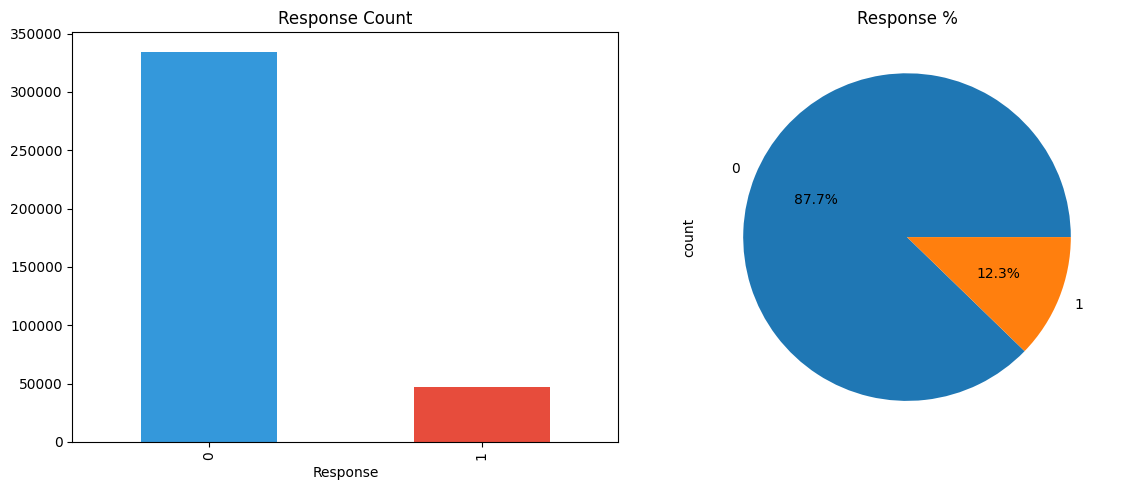

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
df['Response'].value_counts().plot(kind='bar', ax=ax[0], color=['#3498db', '#e74c3c'])
ax[0].set_title('Response Count')
df['Response'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax[1])
ax[1].set_title('Response %')
plt.tight_layout()
plt.savefig(f'{FIGS_PATH}/target_distribution.png', dpi=150)
plt.show()

## 4. Numerical Features

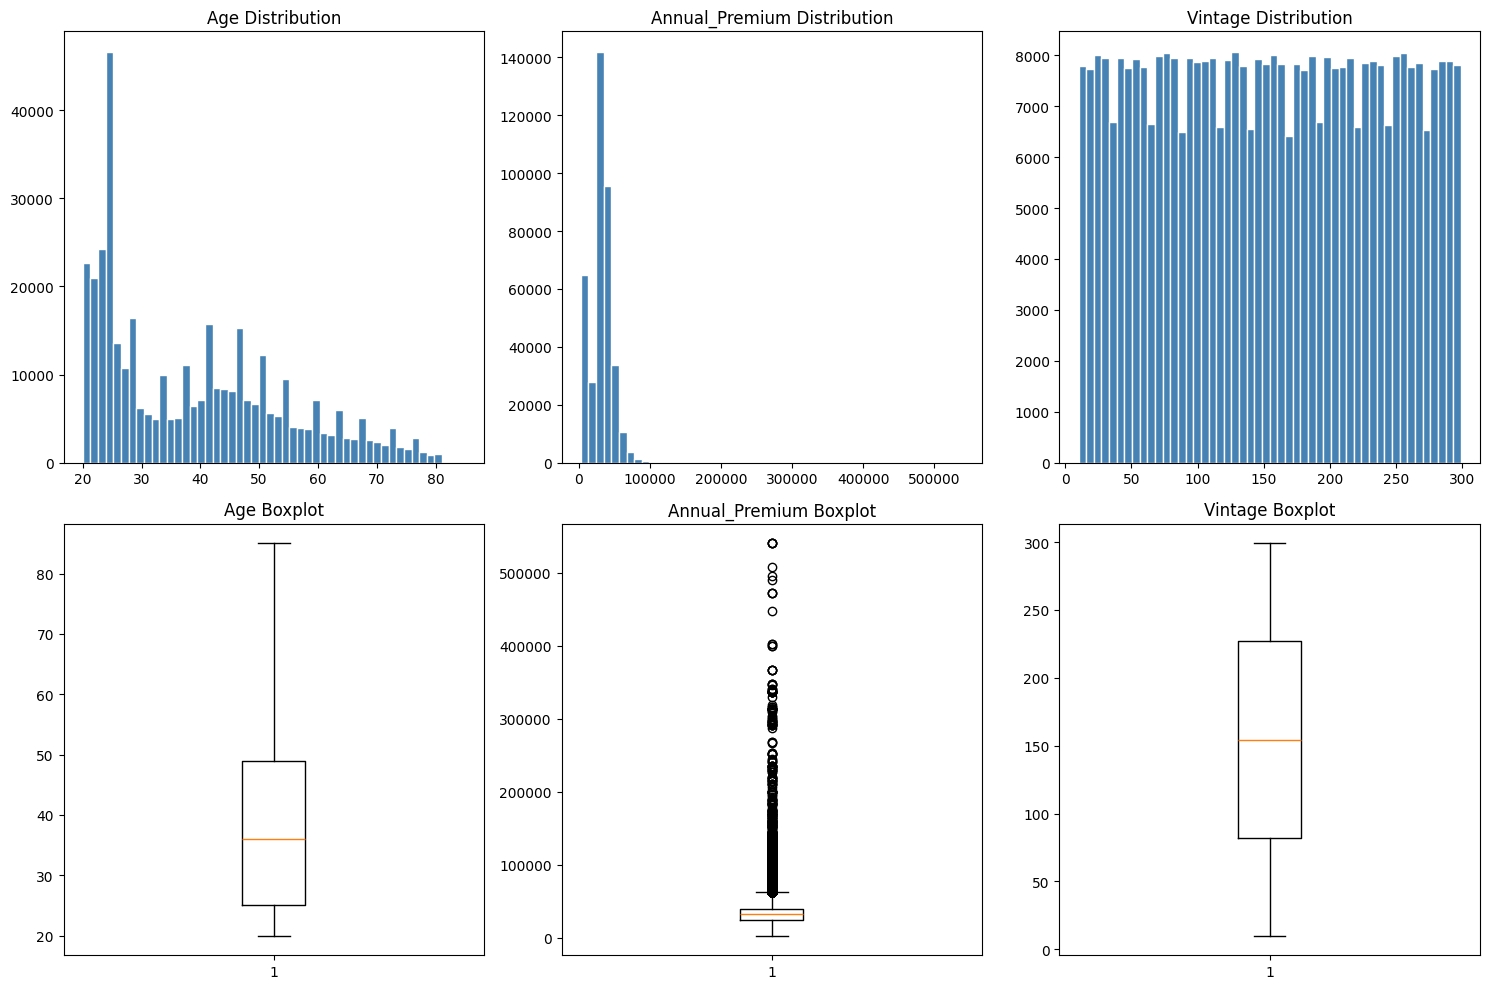

In [35]:
num_cols = ['Age', 'Annual_Premium', 'Vintage']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, col in enumerate(num_cols):
    axes[0, i].hist(df[col], bins=50, color='steelblue', edgecolor='white')
    axes[0, i].set_title(f'{col} Distribution')
    axes[1, i].boxplot(df[col])
    axes[1, i].set_title(f'{col} Boxplot')
plt.tight_layout()
plt.savefig(f'{FIGS_PATH}/numerical_univariate.png', dpi=150)
plt.show()

## 5. Categorical Features

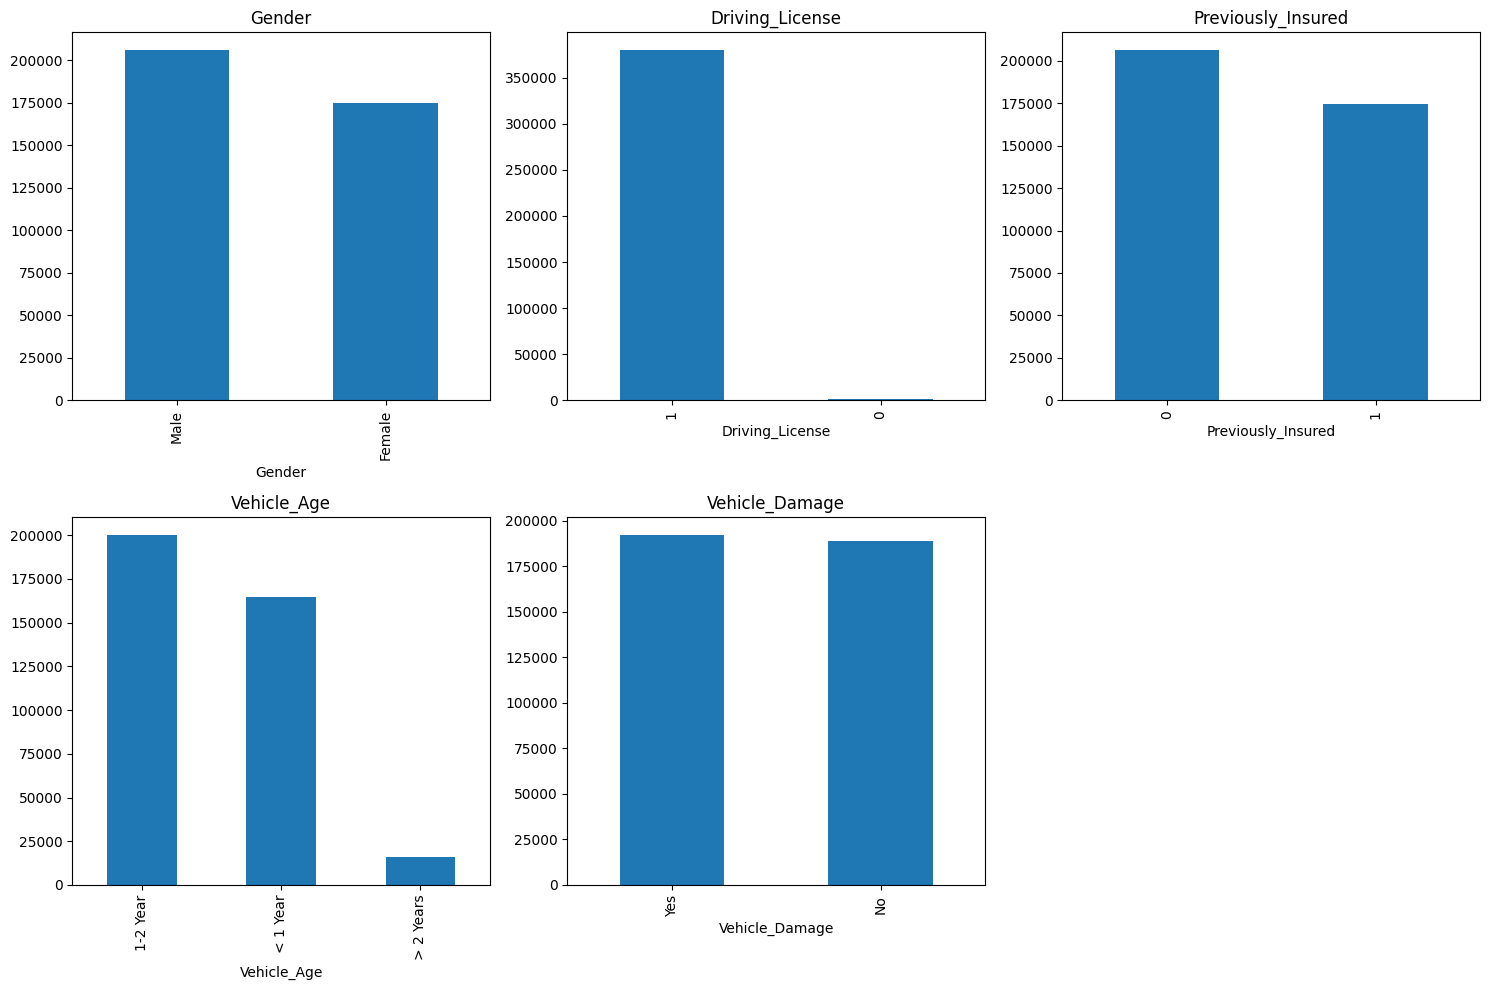

In [33]:
cat_cols = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(cat_cols):
    df[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{col}')
axes[5].axis('off')
plt.tight_layout()
plt.savefig('D:\\younes\\Project-ML\\MiniProjetGL4_Insurance\\figs\\categorical_univariate.png', dpi=150)
plt.show()

## 6. Features vs Target

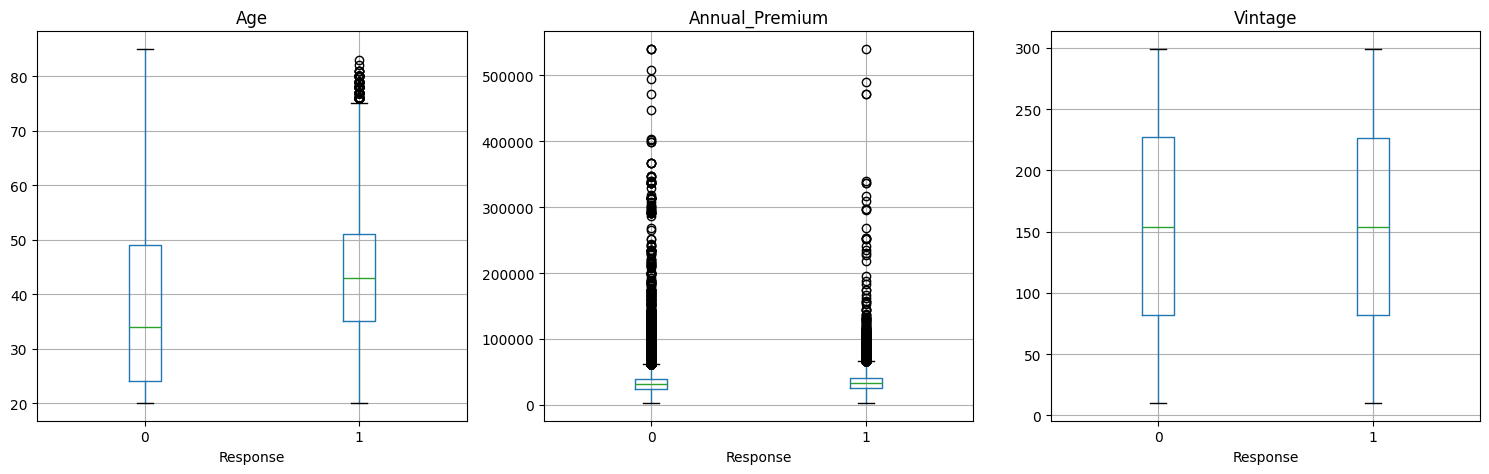

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(num_cols):
    df.boxplot(column=col, by='Response', ax=axes[i])
plt.suptitle('')
plt.tight_layout()
plt.savefig('D:\\younes\\Project-ML\\MiniProjetGL4_Insurance\\figs\\numerical_vs_target.png', dpi=150)
plt.show()

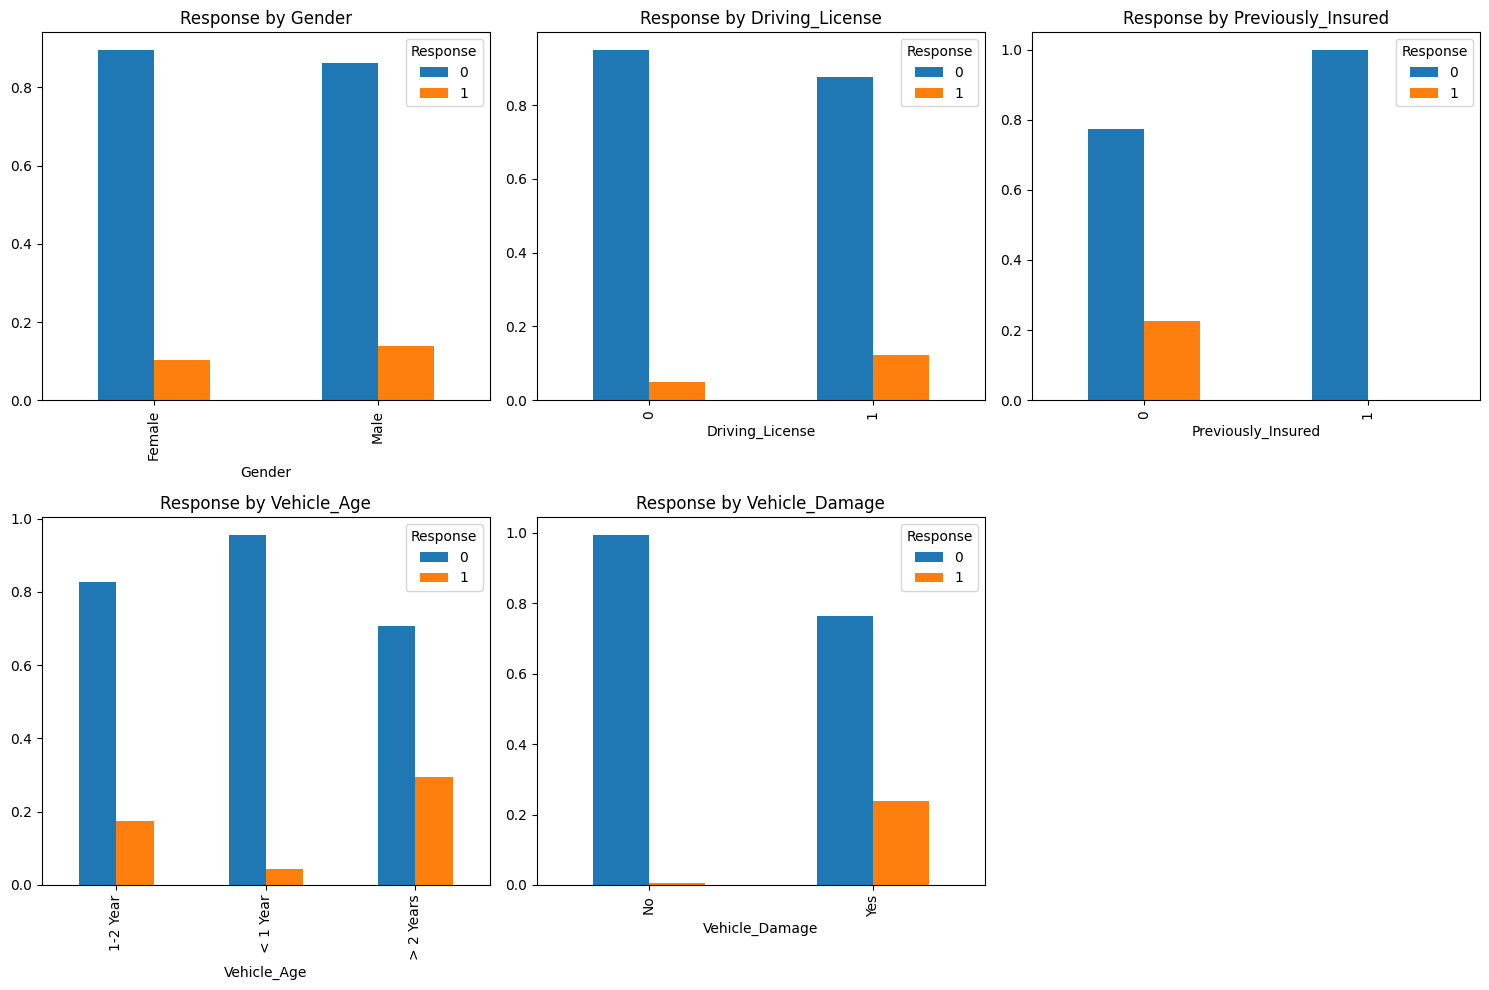

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(cat_cols):
    pd.crosstab(df[col], df['Response'], normalize='index').plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Response by {col}')
axes[5].axis('off')
plt.tight_layout()
plt.savefig('D:\\younes\\Project-ML\\MiniProjetGL4_Insurance\\figs\\categorical_vs_target.png', dpi=150)
plt.show()

## 7. Correlation Matrix

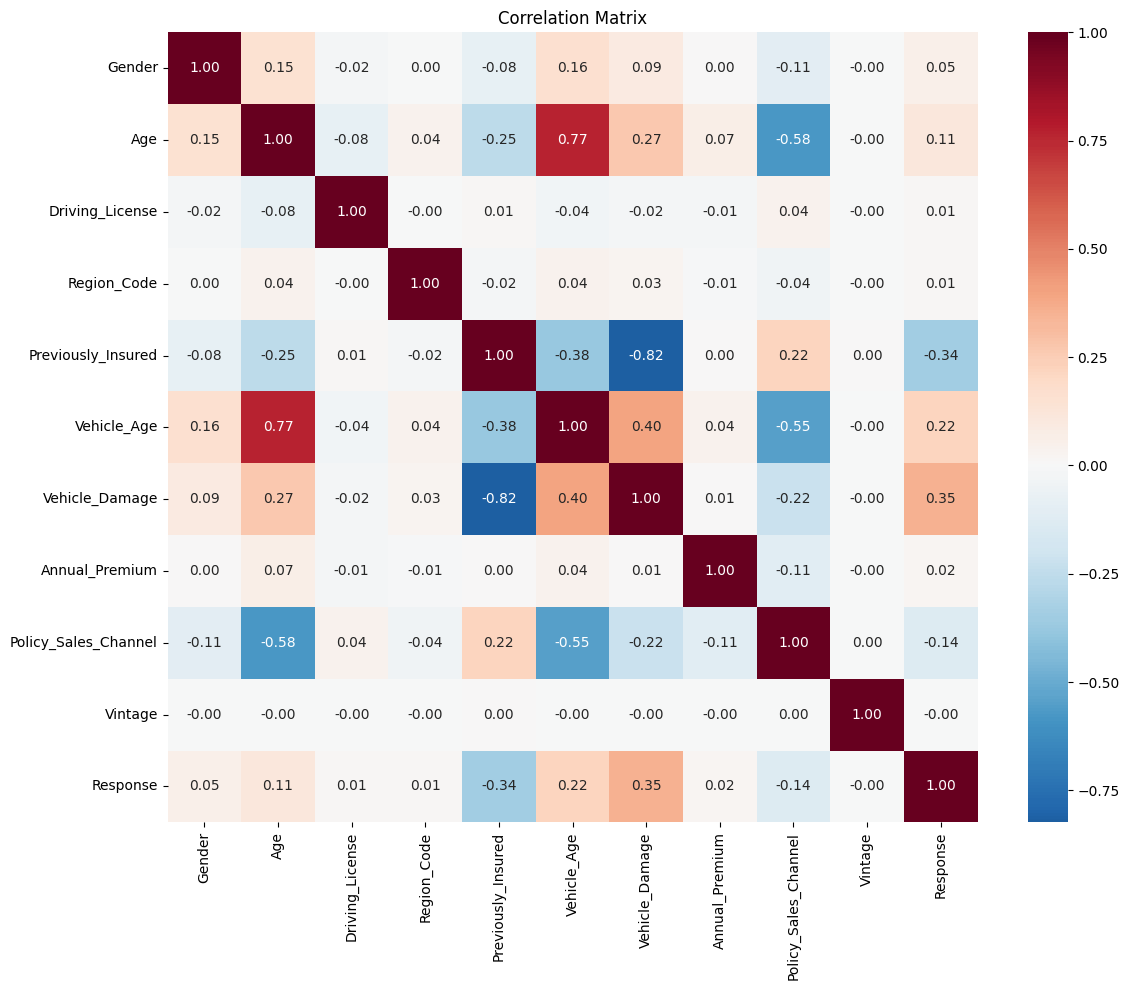

In [ ]:
df_enc = df.copy()
df_enc['Gender'] = df_enc['Gender'].map({'Male': 1, 'Female': 0})
df_enc['Vehicle_Age'] = df_enc['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})
df_enc['Vehicle_Damage'] = df_enc['Vehicle_Damage'].map({'Yes': 1, 'No': 0})
corr = df_enc.drop('id', axis=1).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='RdBu_r', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('D:\\younes\\Project-ML\\MiniProjetGL4_Insurance\\figs\\correlation_matrix.png', dpi=150)
plt.show()

## 8. Key Insights

In [ ]:
print('EDA KEY INSIGHTS:')
print('1. Class imbalance: ~88% No, ~12% Yes')
print('2. Vehicle_Damage highly correlated with Response')
print('3. Previously_Insured negatively correlated')
print('4. Annual_Premium has outliers')
print('5. Middle-aged customers more likely to subscribe')

EDA KEY INSIGHTS:
1. Class imbalance: ~88% No, ~12% Yes
2. Vehicle_Damage highly correlated with Response
3. Previously_Insured negatively correlated
4. Annual_Premium has outliers
5. Middle-aged customers more likely to subscribe
